<a href="https://colab.research.google.com/github/awalinrizky/mandiri12/blob/main/Mandiri12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
sns.set(style="whitegrid")

In [12]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum12/data/data cancer.csv')

print("Dataset loaded:", df.shape)
display(df.head())

# Hapus kolom yang tidak penting
df = df.drop(columns=['Unnamed: 32'], errors='ignore')
df = df.drop(columns=['id'], errors='ignore')

# Convert label M/B → 1/0
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.drop(columns=['diagnosis'])

Dataset loaded: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# 2. Pisahkan fitur & label
X = df.drop(columns=['target'])
y = df['target']

print("\nFitur:", X.shape, "Label:", y.shape)


Fitur: (569, 30) Label: (569,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [6]:
# 4. Standarisasi
# ================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# 5. Baseline Model (Tanpa PCA)
# ================================================
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)
pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, pred_no_pca)
print("\nAkurasi SVM tanpa PCA :", acc_no_pca)
print(classification_report(y_test, pred_no_pca))
print(confusion_matrix(y_test, pred_no_pca))


Akurasi SVM tanpa PCA : 0.972027972027972
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

[[90  0]
 [ 4 49]]



Explained variance ratio: [0.43806214 0.19176476 0.09589244]
Total explained variance: 0.7257193355697897


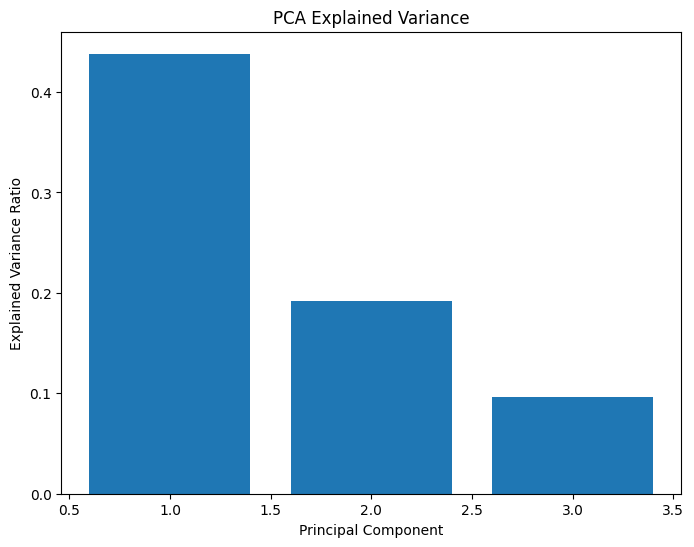

In [8]:
# 6. PCA (3 Komponen Utama)
# ================================================
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

# Plot
plt.figure()
plt.bar([1,2,3], pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance")
plt.show()

In [13]:
# 7. Model SVM + PCA
# ================================================
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, pred_pca)
print("\nAkurasi SVM dengan PCA :", acc_pca)
print(classification_report(y_test, pred_pca))
print(confusion_matrix(y_test, pred_pca))


Akurasi SVM dengan PCA : 0.965034965034965
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

[[90  0]
 [ 5 48]]


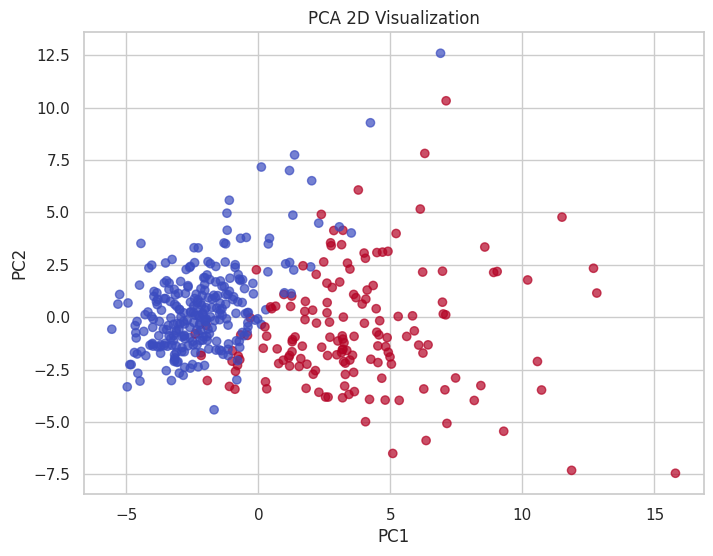

In [14]:
# 8. Visualisasi PCA 2D
# ================================================
plt.figure()
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Visualization")
plt.show()

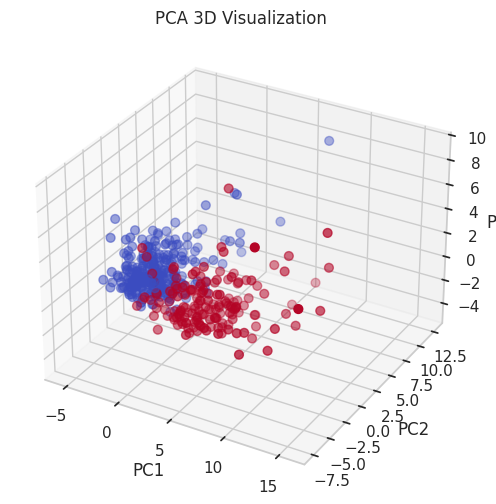

In [15]:
# 9. Visualisasi PCA 3D
# ================================================
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_train_pca[:,0], X_train_pca[:,1], X_train_pca[:,2],
    c=y_train, cmap='coolwarm', s=40
)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA 3D Visualization")
plt.show()

In [16]:
# 10. Ringkasan
# ================================================
print("====================================")
print("JUMLAH FITUR ASLI :", X.shape[1])
print("JUMLAH FITUR PCA  :", 3)
print("AKURASI TANPA PCA :", acc_no_pca)
print("AKURASI DENGAN PCA:", acc_pca)
print("TOTAL EXPLAINED VAR:", pca.explained_variance_ratio_.sum())
print("====================================")

JUMLAH FITUR ASLI : 30
JUMLAH FITUR PCA  : 3
AKURASI TANPA PCA : 0.972027972027972
AKURASI DENGAN PCA: 0.965034965034965
TOTAL EXPLAINED VAR: 0.7257193355697897
